In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Read the training data

In [2]:
file_path = r"C:\work\flight-sagemaker-project\data\train.csv"
train = pd.read_csv(file_path)
train


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-18,Banglore,New Delhi,14:05:00,08:15:00,1090,1.0,No Info,12284
1,Jet Airways,2019-06-06,Kolkata,Banglore,18:55:00,04:40:00,585,1.0,In-flight meal not included,7757
2,Jet Airways,2019-04-24,Banglore,Delhi,08:20:00,11:20:00,180,0.0,In-flight meal not included,4544
3,Air Asia,2019-04-27,Kolkata,Banglore,22:50:00,01:20:00,150,0.0,No Info,4409
4,Jet Airways,2019-06-03,Banglore,Delhi,18:55:00,22:00:00,185,0.0,No Info,8016
...,...,...,...,...,...,...,...,...,...,...
635,Spicejet,2019-04-12,Banglore,Delhi,09:30:00,12:20:00,170,0.0,No Info,4991
636,Jet Airways,2019-03-12,Banglore,New Delhi,09:45:00,14:25:00,280,1.0,No Info,12295
637,Spicejet,2019-04-03,Mumbai,Hyderabad,05:45:00,07:15:00,90,0.0,No check-in baggage included,1965
638,Jet Airways,2019-05-15,Banglore,Delhi,19:50:00,22:50:00,180,0.0,In-flight meal not included,4030


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
    col:pd.to_datetime(train.loc[:,col],dayfirst = True,format= "mixed")
    for col in ["date_of_journey","dep_time","arrival_time"]
})
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [5]:
train.dtypes


airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-18,Banglore,New Delhi,2024-09-17 14:05:00,2024-09-17 08:15:00,1090,1.0,No Info,12284
1,Jet Airways,2019-06-06,Kolkata,Banglore,2024-09-17 18:55:00,2024-09-17 04:40:00,585,1.0,In-flight meal not included,7757
2,Jet Airways,2019-04-24,Banglore,Delhi,2024-09-17 08:20:00,2024-09-17 11:20:00,180,0.0,In-flight meal not included,4544
3,Air Asia,2019-04-27,Kolkata,Banglore,2024-09-17 22:50:00,2024-09-17 01:20:00,150,0.0,No Info,4409
4,Jet Airways,2019-06-03,Banglore,Delhi,2024-09-17 18:55:00,2024-09-17 22:00:00,185,0.0,No Info,8016
...,...,...,...,...,...,...,...,...,...,...
635,Spicejet,2019-04-12,Banglore,Delhi,2024-09-17 09:30:00,2024-09-17 12:20:00,170,0.0,No Info,4991
636,Jet Airways,2019-03-12,Banglore,New Delhi,2024-09-17 09:45:00,2024-09-17 14:25:00,280,1.0,No Info,12295
637,Spicejet,2019-04-03,Mumbai,Hyderabad,2024-09-17 05:45:00,2024-09-17 07:15:00,90,0.0,No check-in baggage included,1965
638,Jet Airways,2019-05-15,Banglore,Delhi,2024-09-17 19:50:00,2024-09-17 22:50:00,180,0.0,In-flight meal not included,4030


## 3. High-level Summary of Data 

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [9]:
train.describe(include= "number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,615.648438,0.793750,9081.328125
std,505.457007,0.683788,4739.586745
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5403.000000
50%,472.500000,1.000000,8366.000000
75%,910.000000,1.000000,12678.000000
max,2315.000000,3.000000,62427.000000


In [10]:
(
    train
    .assign(total_stops= train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,231,260,260,323.0,503


## 4.High-level analysis of Missing Values

In [11]:

eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## 5. High-level analysis of Outliers

In [12]:
forest = IsolationForest(n_estimators = 10, random_state = 42)

In [13]:
(
    train
    .assign(outlier= forest.fit_predict(train
                                        .drop(columns = "price")
                                        .select_dtypes(include = "number")))
    .query("outlier == -1")
    #.duration
    #.describe()
    
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
4,Jet Airways,2019-06-03,Banglore,Delhi,2024-09-17 18:55:00,2024-09-17 22:00:00,185,0.0,No Info,8016,-1
5,Air India,2019-06-03,Delhi,Cochin,2024-09-17 20:15:00,2024-09-17 19:15:00,1380,2.0,No Info,13381,-1
6,Jet Airways,2019-06-03,Delhi,Cochin,2024-09-17 09:35:00,2024-09-17 12:35:00,1620,2.0,In-flight meal not included,11507,-1
18,Jet Airways,2019-06-24,Mumbai,Hyderabad,2024-09-17 02:55:00,2024-09-17 04:20:00,85,0.0,In-flight meal not included,4050,-1
19,Air India,2019-06-15,Delhi,Cochin,2024-09-17 22:00:00,2024-09-17 19:15:00,1275,2.0,No Info,10441,-1
...,...,...,...,...,...,...,...,...,...,...,...
623,Jet Airways,2019-05-01,Kolkata,Banglore,2024-09-17 17:00:00,2024-09-17 21:05:00,1685,1.0,No Info,12121,-1
625,Jet Airways,2019-03-27,Delhi,Cochin,2024-09-17 05:10:00,2024-09-17 19:45:00,2315,2.0,In-flight meal not included,8098,-1
629,Vistara,2019-06-15,Chennai,Kolkata,2024-09-17 17:45:00,2024-09-17 20:05:00,140,0.0,No Info,11982,-1
636,Jet Airways,2019-03-12,Banglore,New Delhi,2024-09-17 09:45:00,2024-09-17 14:25:00,280,1.0,No Info,12295,-1


## 6. Pair Plots

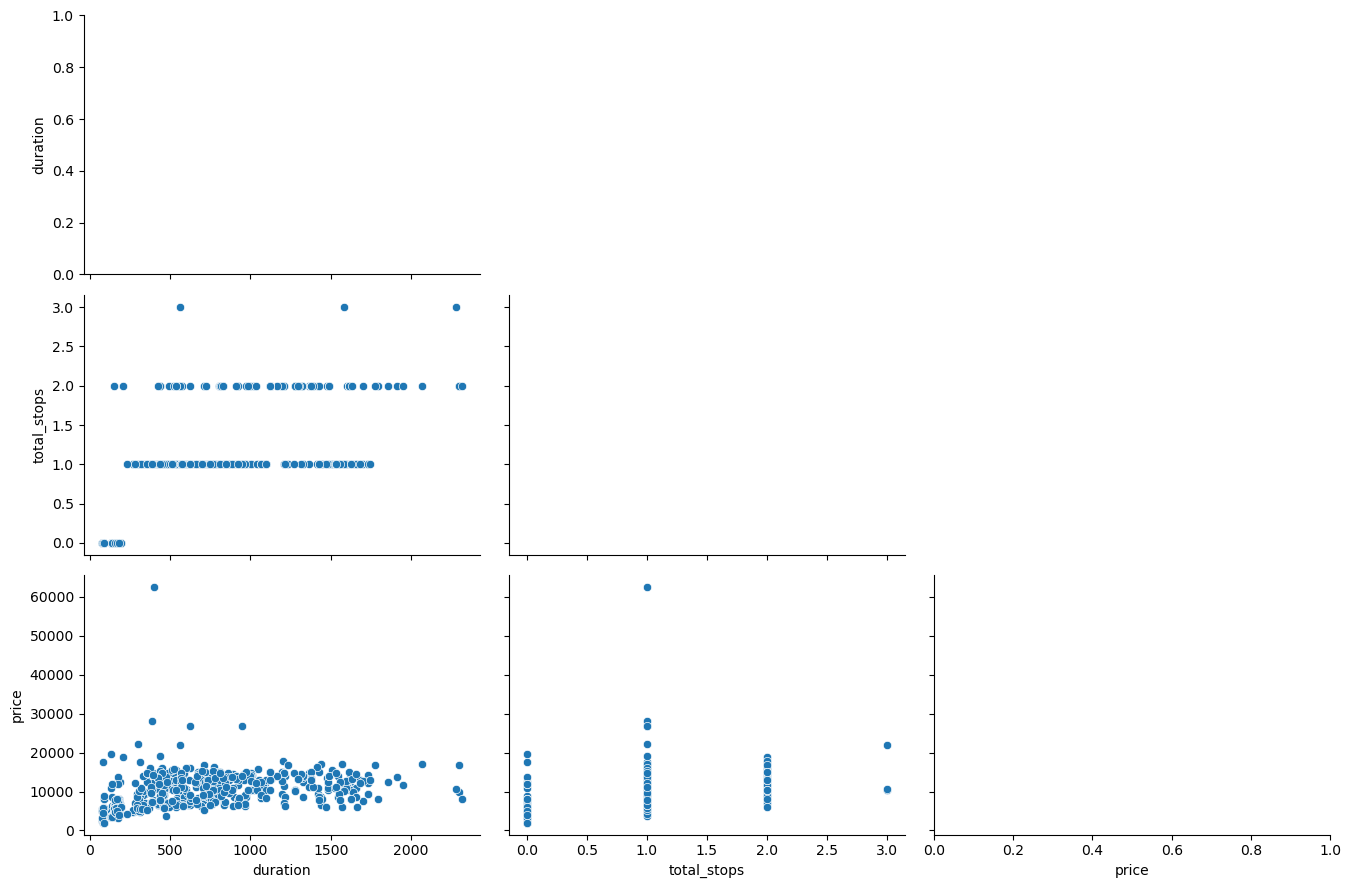

In [14]:
eda_helper_functions.pair_plots(train)

### 7. Correlation Analysis

C:\Users\Vishal Singh\anaconda3\envs\test_env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


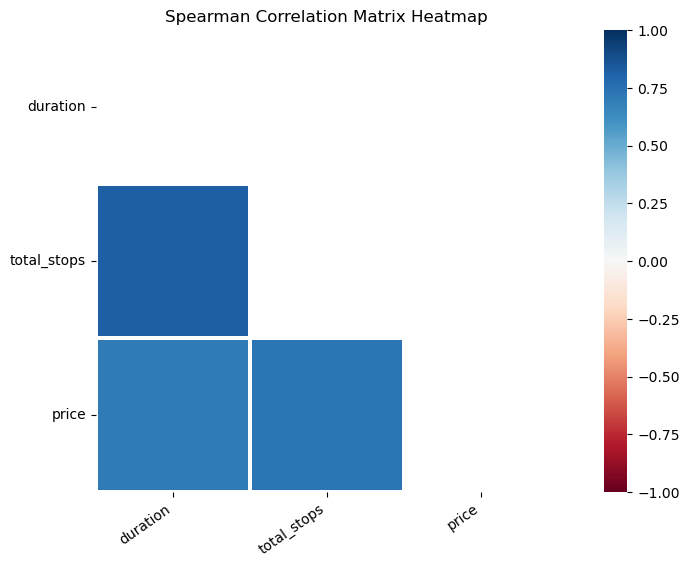

In [15]:
eda_helper_functions.correlation_heatmap(train)

C:\Users\Vishal Singh\anaconda3\envs\test_env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


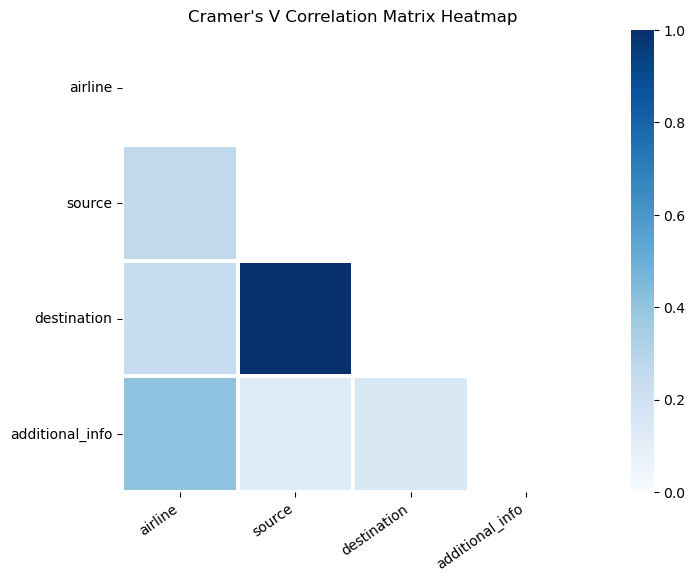

In [16]:
eda_helper_functions.cramersV_heatmap(train)

### 8. detailed Analysis

In [17]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## 8.1 airlines

In [18]:
train.airline

0      Jet Airways
1      Jet Airways
2      Jet Airways
3         Air Asia
4      Jet Airways
          ...     
635       Spicejet
636    Jet Airways
637       Spicejet
638    Jet Airways
639    Jet Airways
Name: airline, Length: 640, dtype: object

In [19]:
eda_helper_functions.cat_summary(train,"airline")

0      Jet Airways
1      Jet Airways
2      Jet Airways
3         Air Asia
4      Jet Airways
          ...     
635       Spicejet
636    Jet Airways
637       Spicejet
638    Jet Airways
639    Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,231


,count,percentage
category,,
Jet Airways,231,0.360938
Indigo,133,0.207813
Air India,84,0.131250
Multiple Carriers,73,0.114062
Spicejet,55,0.085938
Vistara,36,0.056250
Air Asia,18,0.028125
Goair,10,0.015625


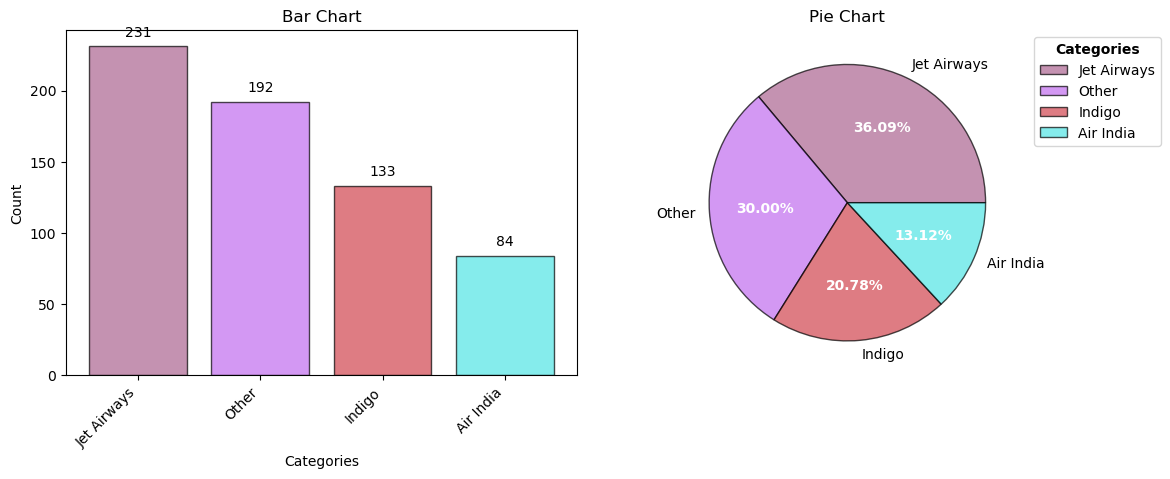

In [20]:
eda_helper_functions.cat_univar_plots(train ,"airline",show_wordcloud= False, k =3)

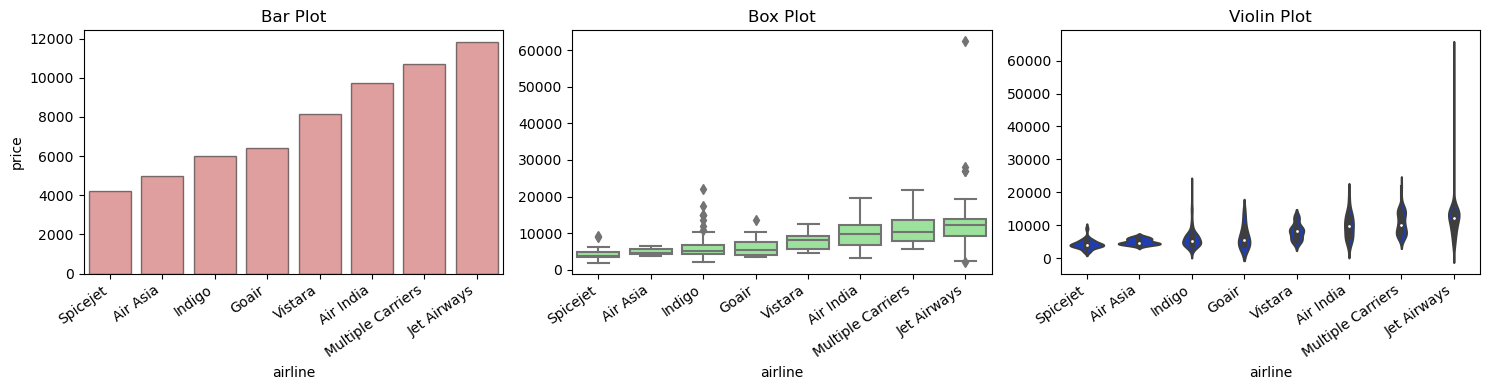

In [21]:
eda_helper_functions.num_cat_bivar_plots(
    data = train,
    num_var='price',
    cat_var= "airline"
)

In [22]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline",0.05)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 46.93912601437152
- p-value              : 1.3254417772239395e-53
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 294.9292447691563
- p-value              : 7.318911297934113e-60
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


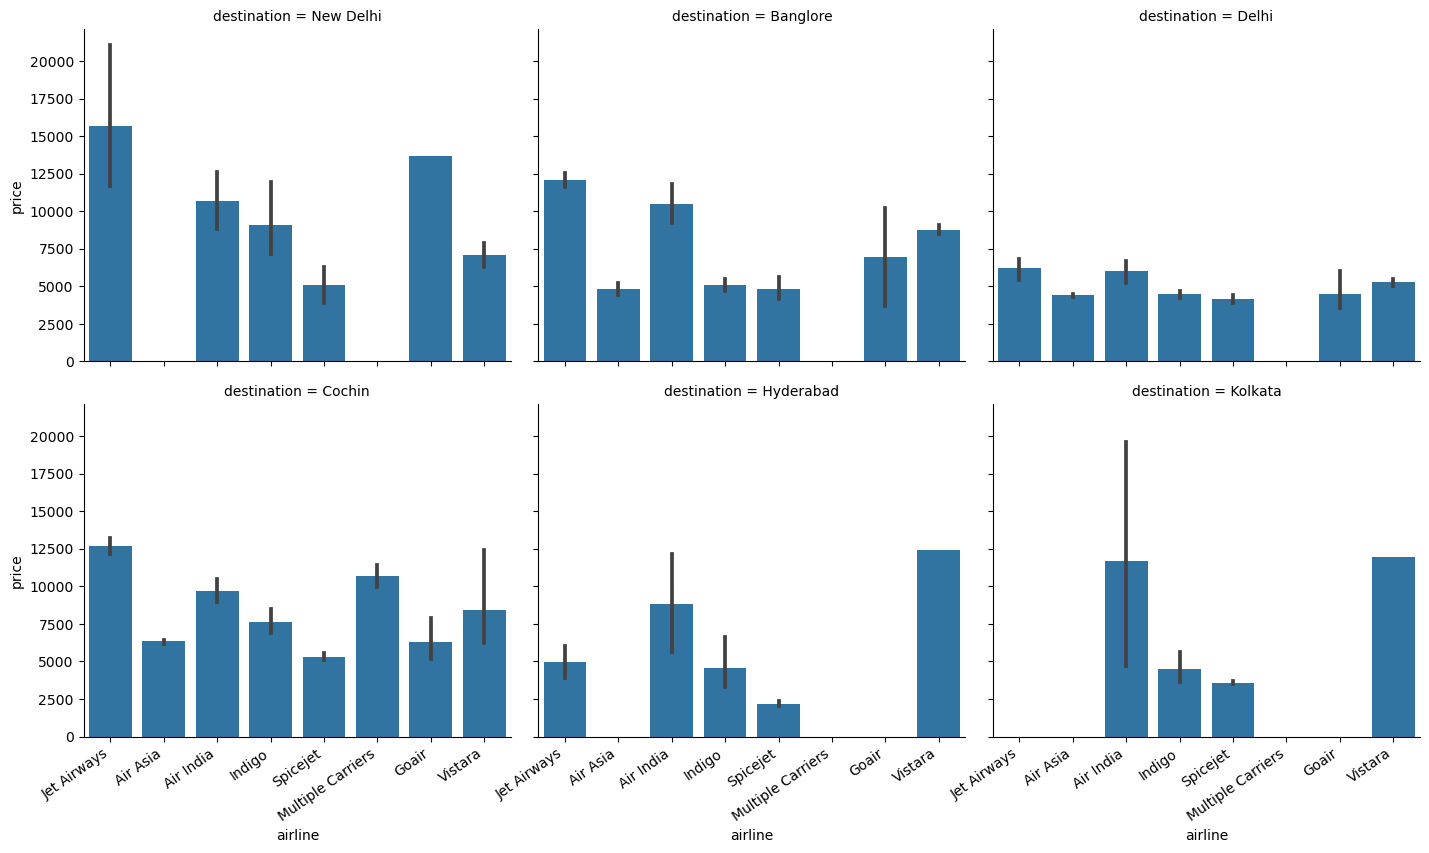

In [23]:
airline_grid = sns.FacetGrid(
    data = train,
    col = "destination",
    col_wrap  = 3,
    height = 4,
    aspect = 1.2,
    sharey =  True
)
airline_grid.map(sns.barplot,"airline","price",order = train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

## 8.2 date_of_journey

In [24]:
train.date_of_journey

0     2019-03-18
1     2019-06-06
2     2019-04-24
3     2019-04-27
4     2019-06-03
         ...    
635   2019-04-12
636   2019-03-12
637   2019-04-03
638   2019-05-15
639   2019-03-12
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

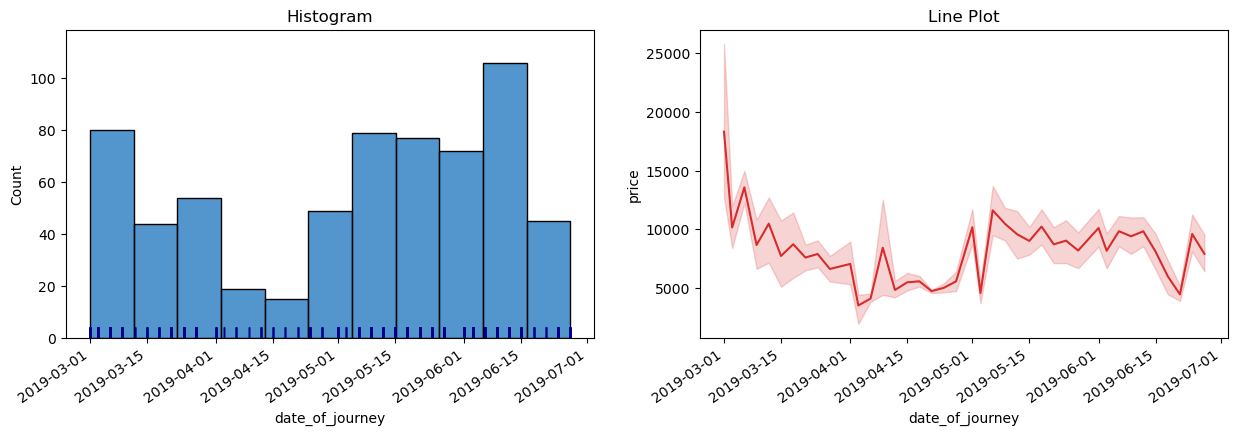

In [25]:
eda_helper_functions.dt_univar_plots(
    data = train,
    var = 'date_of_journey',
    target = "price"
)

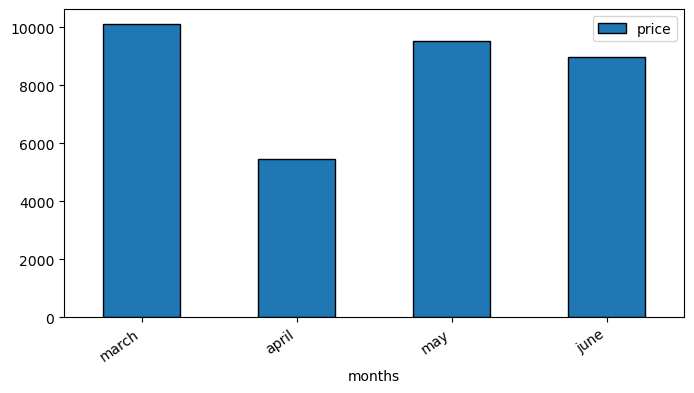

In [26]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey",freq = 'M'))
    .price.mean()
    .to_frame()
    .set_axis(['march','april','may','june'],axis = 0)
    .rename_axis(index='months')
    .plot(
        kind = 'bar',
        figsize = (8,4),
        edgecolor = 'black'
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

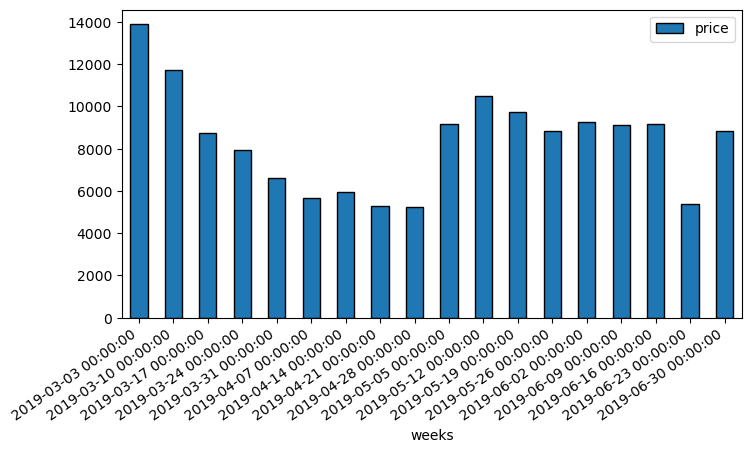

In [27]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey",freq = 'W'))
    .price.mean()
    .to_frame()
    #.set_axis(['march','april','may','june'],axis = 0)
    .rename_axis(index='weeks')
    .plot(
        kind = 'bar',
        figsize = (8,4),
        edgecolor = 'black'
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

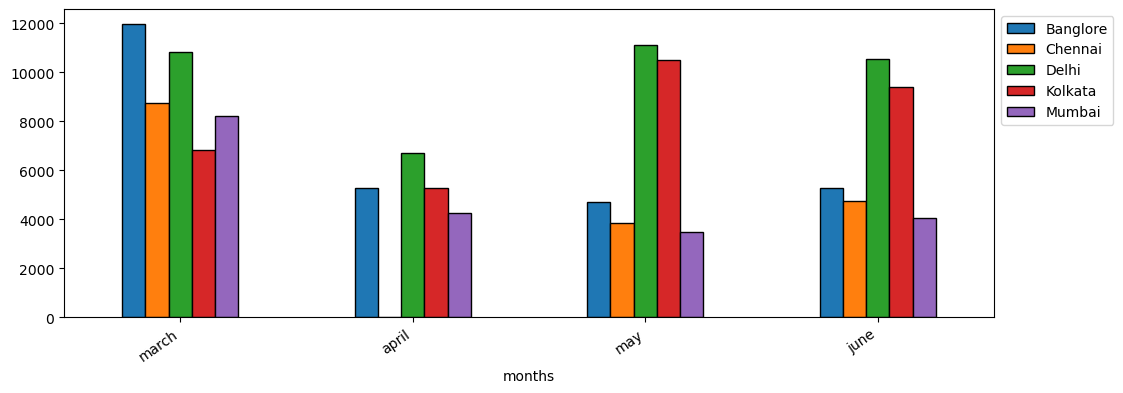

In [28]:
(
    train
    .groupby([pd.Grouper(key ="date_of_journey",freq = "M"),'source'])
    .price.mean()
    .unstack(fill_value =0)
    .set_axis(['march','april','may','june'],axis = 0)
    .rename_axis(index='months')
    .plot(
        kind = 'bar',
        figsize = (12,4),
        edgecolor = 'black'
    )
)
ax = plt.gca()

ax.legend(
    loc = "upper left",
    bbox_to_anchor=(1,1)
)

eda_helper_functions.rotate_xlabels(ax)

## 8.3 dept_time

In [29]:
train.dep_time

0     2024-09-17 14:05:00
1     2024-09-17 18:55:00
2     2024-09-17 08:20:00
3     2024-09-17 22:50:00
4     2024-09-17 18:55:00
              ...        
635   2024-09-17 09:30:00
636   2024-09-17 09:45:00
637   2024-09-17 05:45:00
638   2024-09-17 19:50:00
639   2024-09-17 20:35:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

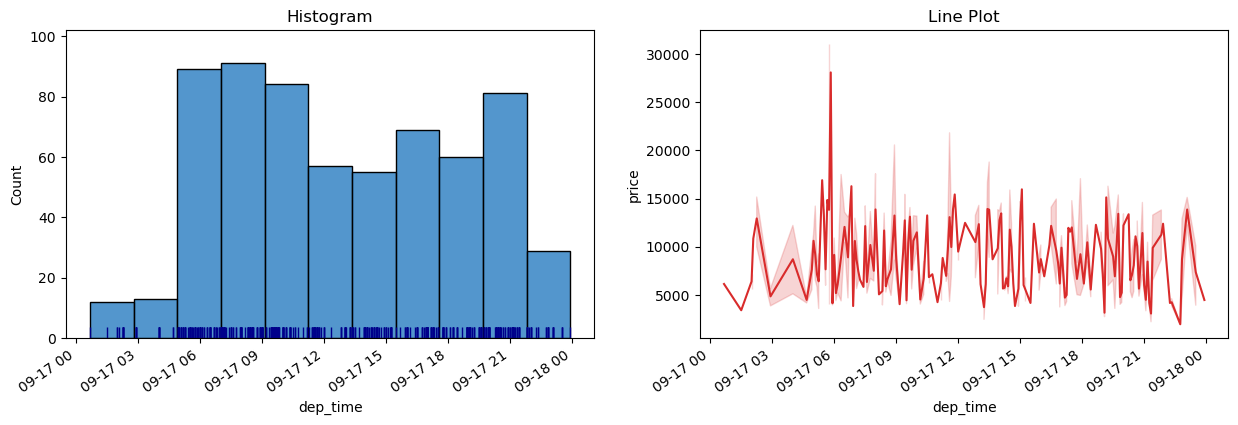

In [30]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

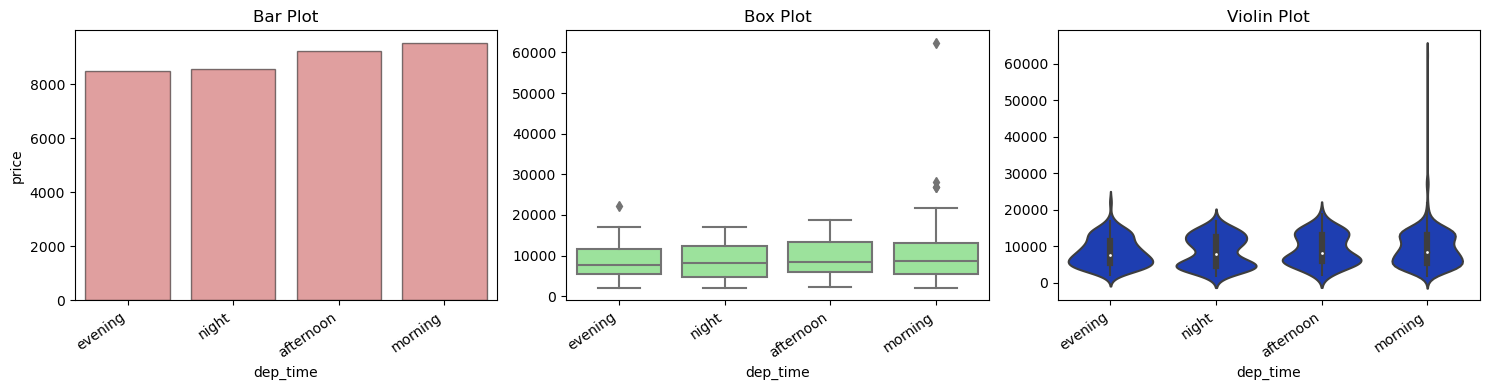

In [31]:
(
    train
    .assign(dep_time = lambda df_:(
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive = "left"),
                  df_.dep_time.dt.hour.between(12,16,inclusive = "left"),
                  df_.dep_time.dt.hour.between(16,20,inclusive = "left")],
                  ["morning","afternoon","evening"],
                  default = "night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")
)

## 8.4 duration 

In [32]:
train.duration

0      1090
1       585
2       180
3       150
4       185
       ... 
635     170
636     280
637      90
638     180
639     850
Name: duration, Length: 640, dtype: int64

In [33]:
eda_helper_functions.num_summary(train,"duration")

0      1090
1       585
2       180
3       150
4       185
       ... 
635     170
636     280
637      90
638     180
639     850
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,472.5
75,910.0
90,1440.0
95,1620.0
99,1891.6


,value
mean,615.648438
trimmed mean (5%),579.626736
trimmed mean (10%),548.027344
median,472.500000


,value
var,255486.785444
std,505.457007
IQR,740.000000
mad,312.500000
coef_variance,0.821016


,value
skewness,0.963385
kurtosis,0.034808


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.28380533206766e-22
Test Statistic       : 0.8734883666038513
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 27.053744999467426
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [34]:
train.duration.quantile([0.25,0.5,0.75])

0.25    170.0
0.50    472.5
0.75    910.0
Name: duration, dtype: float64

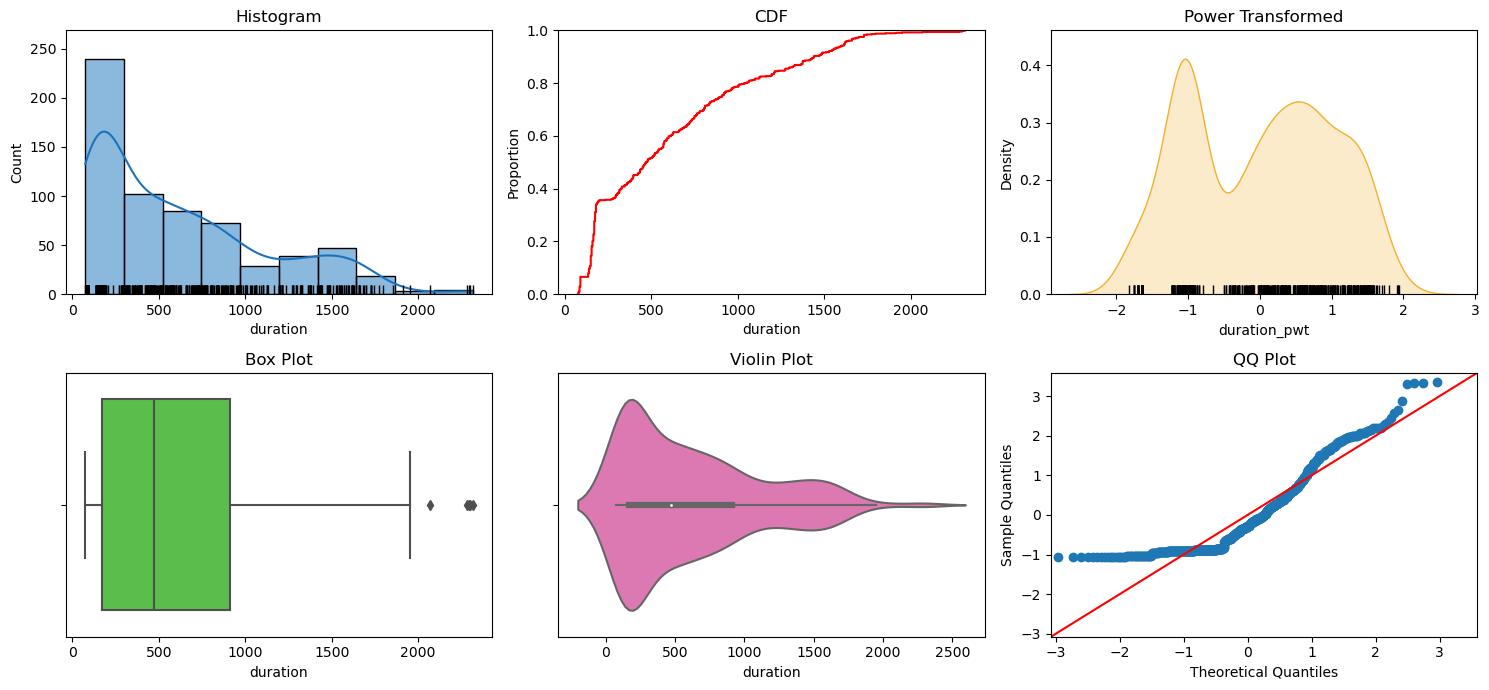

In [35]:
eda_helper_functions.num_univar_plots(train,'duration')

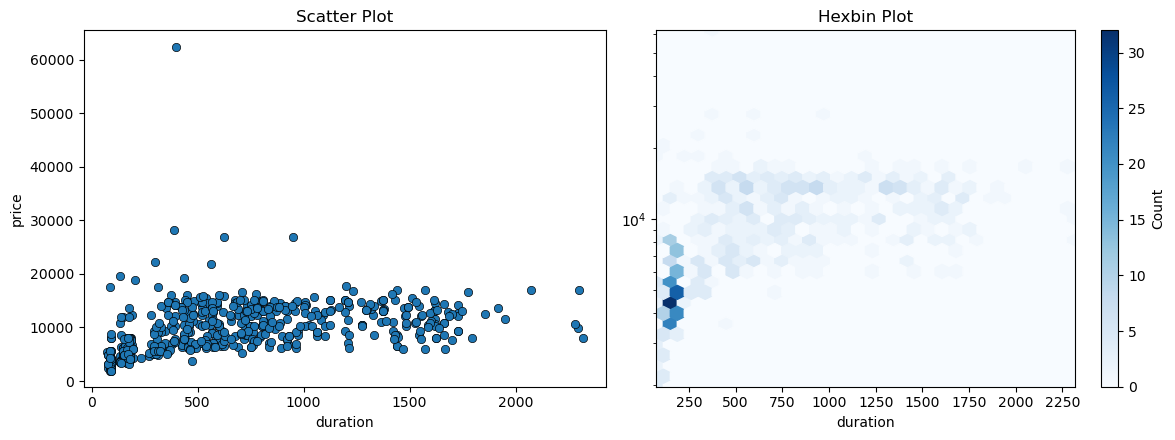

In [36]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs = dict(
        yscale ="log",
        gridsize = 30,
        cmap = "Blues"
    )
    
)

In [38]:
eda_helper_functions.num_num_hyp_testing(train,'price','duration')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.48618957292319975
- p-value              : 2.8066678664129966e-39
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7044812318497045
- p-value              : 4.4193665793947865e-97
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


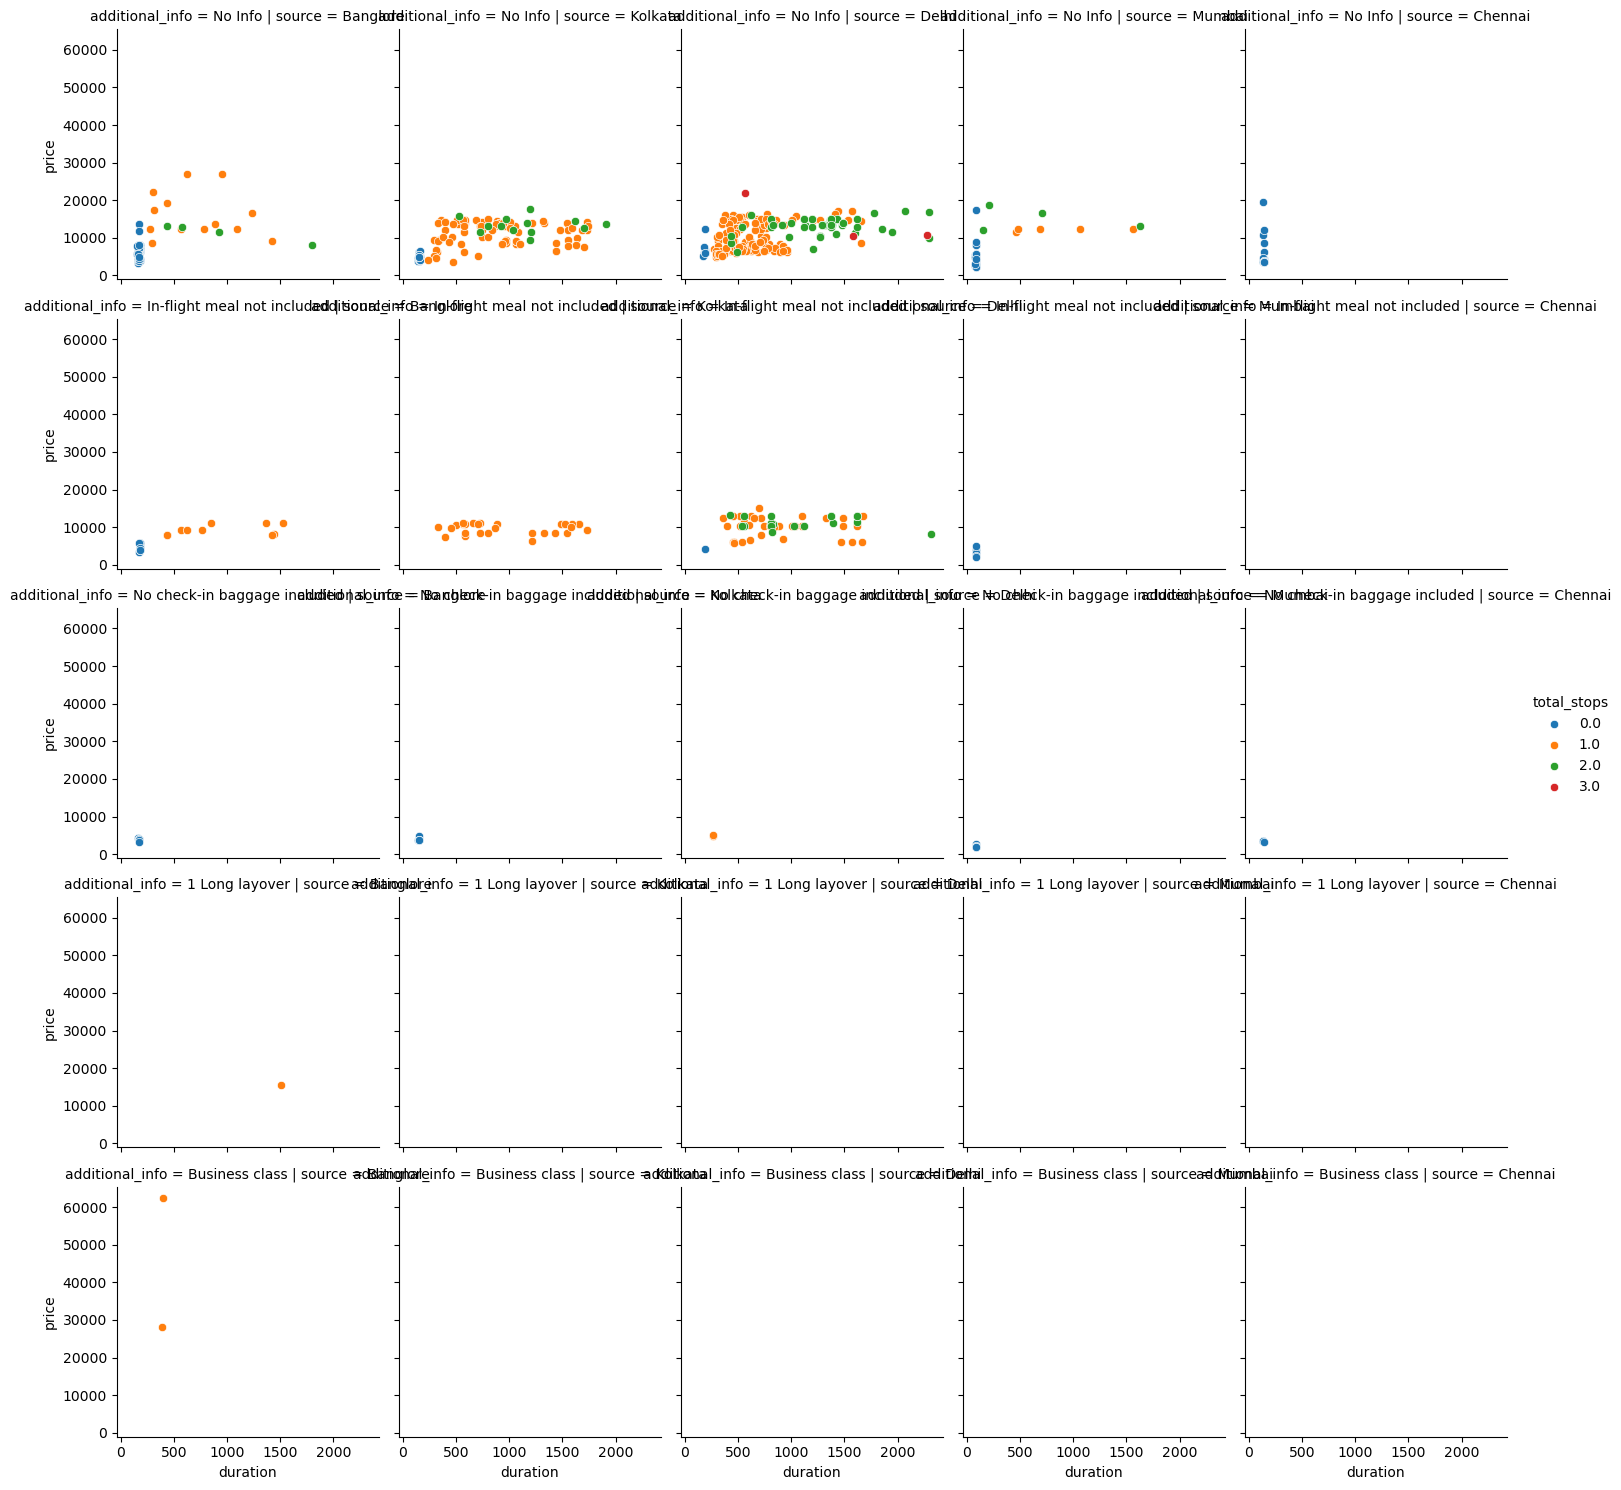

In [47]:
duration_grid = sns.FacetGrid(
    data = train,
    col = "source",
    row = "additional_info",
    hue = "total_stops",
    sharey = True
)

duration_grid.map(sns.scatterplot,"duration","price")

duration_grid.add_legend()

### 9. Automated EDA

In [50]:
from ydata_profiling import ProfileReport

In [51]:
report = ProfileReport(train)

In [52]:
report.to_file(output_file= "output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]